In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris

In [5]:
iris_data = load_iris()
print("keys of iris dataset: {}".format(iris_data.keys()))

keys of iris dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [8]:
iris_data.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 150 (50 in each of three classes)\n:Number of Attributes: 4 numeric, predictive attributes and the class\n:Attribute Information:\n    - sepal length in cm\n    - sepal width in cm\n    - petal length in cm\n    - petal width in cm\n    - class:\n            - Iris-Setosa\n            - Iris-Versicolour\n            - Iris-Virginica\n\n:Summary Statistics:\n\n============== ==== ==== ======= ===== ====================\n                Min  Max   Mean    SD   Class Correlation\n============== ==== ==== ======= ===== ====================\nsepal length:   4.3  7.9   5.84   0.83    0.7826\nsepal width:    2.0  4.4   3.05   0.43   -0.4194\npetal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\npetal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n============== ==== ==== ======= ===== ====================\n\n:Missing Attribute Values: None\n:Class Distribution: 

In [9]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
print("Target names: {}".format(iris_data['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [12]:
iris_data.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data['data'], iris_data['target'], test_size= 0.3, random_state=1)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.plotting import parallel_coordinates

In [ ]:
print(type(iris_data)) 

<class 'sklearn.utils._bunch.Bunch'>


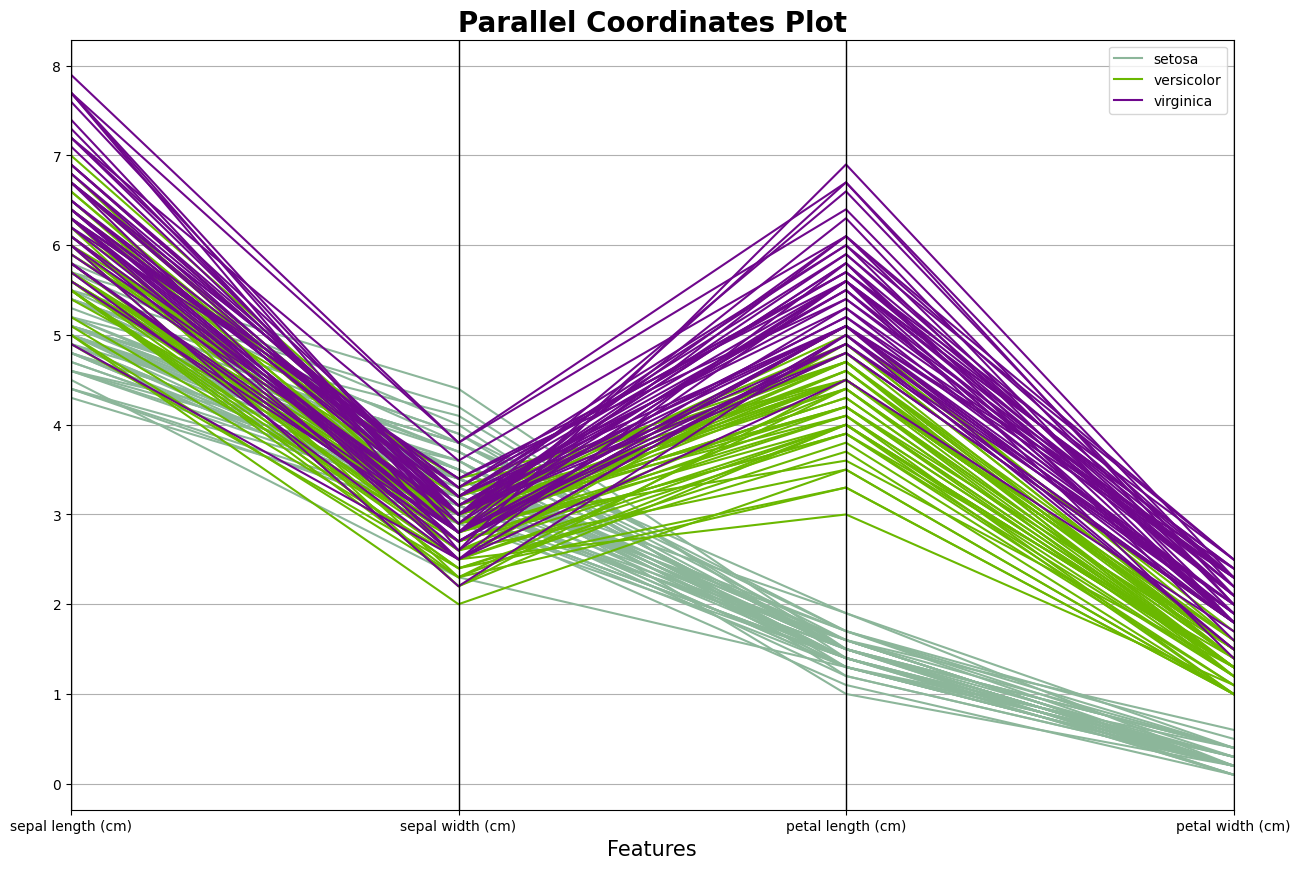

In [ ]:
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data['Species'] = iris.target_names[iris.target]


plt.figure(figsize=(15, 10))
parallel_coordinates(iris_data, "Species")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.show()

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

#k=3
knn = KNeighborsClassifier(n_neighbors=3)


knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [27]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 12]])

In [28]:
acc = accuracy_score(y_pred,y_test) * 100
print("Accuracy: {}".format(acc))

Accuracy: 97.77777777777777


In [29]:
def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    return knn.predict([[sepal_length, sepal_width, petal_length, petal_width]])[0]

In [ ]:
species = predict_species(5.1, 3.5, 1.4, 0.2) 
print(f"Predicted Species: {species}")

#here, 0 = setosa, 1 = versicolor, 2 = virginica

Predicted Species: 0
